# Lineare und logistische Regression mit Python

## Was ist Regression eigentlich ?

### Kurz und knapp:

Anhand der Regression lässt sich feststellen, ob sich durch eine Variable eine andere erklären lässt und ob es einen Zusammenhang zwischen diesen gibt. Ziel ist es dann, mithilfe der unabhängigen Variablen die abhängige Zielvariable vorherzusagen.
Mögliche Fragestellungen einer Regression wären bspw:

- Steigt die Armut bei Familien, wenn diese mehr Kinder haben ? 

- Sinkt die Anzahl der Temposünder, wenn man mehr Schilder aufstellt ?

- Verbessert sich die Note einer Prüfung, wenn das Bestehen von Scheinaufgaben erforderlich sind für die Teilnahme.

Hierbei wird die lineare Regression verwendet, wenn der Zusammenhang zwischen einer abhängigen Variable und einer oder mehreren unabhängigen Variablen ermittelt werden soll.
Die logistische Regression findet ihren Einsatz, wenn der Zusammenhang zwischen einer abhängigen Variable die Binär ist und unabhängigen Variablen ermittelt werden soll.

## Lineare Regression mit Python

Es gibt mehrere Möglichkeiten, die lineare Regression in Python zu realisieren. Mann kann diese entweder mit numpy, scipy, statsmodel oder sckit-learn implementieren. In diesem Notebook werde ich die lineare Regression mithilfe des mächtigen Pythonmoduls scikit-learn erklären. 
Der Datensatz den ich verwenden werde, ist das Boston Housing Dataset (Quelle: UCI Machine Learning Repository). Der Datensatz enthält Daten zum Immobilienwert in den Vororten von Boston.


### Import und Aufbereitung der Daten

Zuerst müssen die benötigten Pakete importiert werden. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

Der Datensatz den wir verwenden möchten, ist bereits im Modul sklearn vorhanden, und muss deswegen einfach nur geladen werden. Den Datensatz wird anschließend im Objekt boston im Datentyp Dictionary gespeichert.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In der Beschreibung des Datensatzes sehen wir, dass wir 13 unabhängige Variablen haben und eine abhänginge Variable (MEDV). Die abhängige Variable wird auch Target genannt. Wir werden jetzt versuchen, mithilfe der 13 Variablen den Preis vorherzusagen.

In [3]:
x = boston.DESCR
print(x)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Zuerst laden wir die Daten in ein Dataframe.

In [4]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Weil das Dataframe die Variablennamen noch nicht enthält, ersetzen wir die Nummerierung mit den Variablennamen.


In [5]:
bos.columns = boston.feature_names
bos.head

<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  

Die Variable die den Preis enthält ist in unserem Dataframe nicht zu finden. Wir holen die Preise aus boston.target und hängen sie dann an das Dataframe an.

In [6]:
bos['PRICE'] = boston.target

#### Lineare Regression mit Scikit-Learn

Um die Preise vorhersagen zu können, müssen wir nun ein lineares Regressionsmodel anpassen. Dazu verwenden wir die LinearRegression.fit Methode von Scikit. Dieser Methode müssen zwei Variablen übergeben werden, damit sie das Modell anpassen kann: 

- Y : Der Target (in diesem Fall der Preis)
- X : Die unabhängige/n Variable/n (in diesem Fall wären dass die 13 übrigen Variablen)

In [7]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1) # weil wir alle Variablen außer den Preis in X haben wollen

# Hier erzeugen wir ein Objekt von LinearRegression

lr = LinearRegression()
lr.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Jetzt können wir uns die mit der [KQ-Methode](https://www.wiwiweb.de/statistik/zeitreihenan/zeitverfahre/kleinstequad.html)  geschätzten Koeffizienten und die Konstante unserer Linearen Gleichung anzeigen lassen.

In [8]:
konstante = lr.intercept_
koeffizienten = lr.coef_
print(konstante)
print(koeffizienten)

36.4911032804
[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


Zur besseren Visualisierung unserer Konstanten erstellen wir einen Dataframe, wo wir an die 13 Variablen den Koeffizienten anhängen. 

In [9]:
pd.DataFrame = list(zip(X.columns, lr.coef_))
pd.DataFrame

[('CRIM', -0.10717055656035455),
 ('ZN', 0.046395219529801988),
 ('INDUS', 0.020860239532176736),
 ('CHAS', 2.688561399317893),
 ('NOX', -17.795758660309126),
 ('RM', 3.8047524602580109),
 ('AGE', 0.00075106170332306377),
 ('DIS', -1.4757587965198149),
 ('RAD', 0.3056550383391009),
 ('TAX', -0.012329346305271827),
 ('PTRATIO', -0.9534635546905541),
 ('B', 0.0093925127221892168),
 ('LSTAT', -0.52546663290079287)]

Das gelernte Regressionsmodell ist also die lineare Gleichung:

Preis = -0,11 CRIM 0,05 ZN 0,02 INDUS... -0,53 LSTAT +36,49

Zudem sieht man nun, dass RM die höchste Korrelation zum Target besitzt. Das lässt sich mit einem Scatterplot mit RM und Preis noch besser verdeutlichen.

<function matplotlib.pyplot.show>

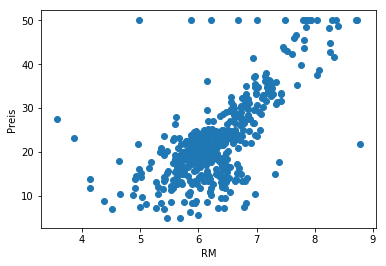

In [10]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("RM")
plt.ylabel("Preis")
plt.show

Nun werden wir den Preis vorhersagen. Um zu schauen, ob unser lineares Regressionsmodell gut genug ist, werden wir in einem Scatterplot die vorhergesagten Preise und die tatsächlichen Preise miteinander vergleichen. Mit der LinearRegression-Methode .predict lässt sich eine Vorhersage berechnen.

<function matplotlib.pyplot.show>

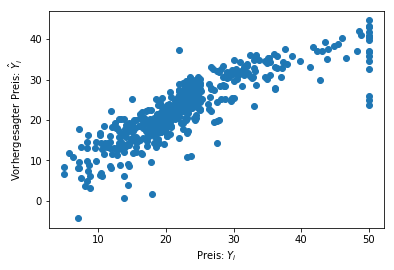

In [11]:
plt.scatter(bos.PRICE, lr.predict(X))
plt.xlabel("Preis: $Y_i$")
plt.ylabel("Vorhergesagter Preis: $\hat{Y}_i$")
plt.show

Hier lässt sich jetzt unschwer erkennen, dass wir falsch geschätzte Werte haben im oberen Preissegment.

Um die Qualität einer Regression zu bestimmen, kann man den MSE ([Mean squared error](https://www.wiwiweb.de/statistik/zeitreihenan/zeitverfahre/kleinstequad.html)) berechnen.
Dieser gibt den quadrierten mittleren Abstand der geschätzten Werte von den tatsächlichen Werten an. Je höher der MSE ist, umso ungenauer ist die Vorhersage. Den MSE werden wir nun berechnen.

In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(bos.PRICE, lr.predict(X))
print(mse)




21.8977792177


Jetzt werden wir ein lineares Regressionsmodell für nur eine Variable aufstellen und den MSE mit dem des Modells über die 13 Variablen vergleichen.

In [13]:
lf= LinearRegression()
lf.fit(X[['PTRATIO']],bos.PRICE)
mean_squared_error(bos.PRICE, lf.predict(X[['PTRATIO']]))


62.652200013769274

Der MSE hat sich mehr als verdoppelt, was bedeutet, dass eine Variable alleine keine gute Vorhersage machen kann. In einem Scatterplot, wo wir den Preis mithilfe des neuen Modells vorhersagen, sieht man noch deutlicher, wie ungenau diese Methode ist.

<function matplotlib.pyplot.show>

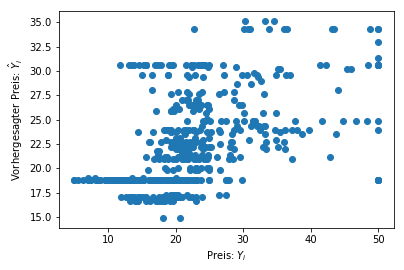

In [14]:
plt.scatter(bos.PRICE, lf.predict(X[['PTRATIO']]))
plt.xlabel("Preis: $Y_i$")
plt.ylabel("Vorhergesagter Preis: $\hat{Y}_i$")
plt.show

### Training und Test

Das Modell das wir gerade aufgebaut haben ist in der Form jedoch unbrauchbar, weil wir für die Erstellung des Modells die selben Daten verwendet haben, auf die wir das Modell dann angewendet haben für die Vorhersage des Preises.
Normalerweise soll ein Modell auf neue Daten angewendet werden und dort möglichst genaue Prognosen erzielen.

Aus diesem Grund wird der Datensatz ein einen Trainigsdatensatz und einen Testdatensatz gesplitet. Mit dem Trainingsdatensatz stellen wir unser Modell auf und am Testdatensatz sehen wir dann, wie gut unsere Regression ist.

Theoretisch könnte man jetzt hergehen und den Boston-Datensatz einfach in der Mitte in Trainings- und Testdatensatz teilen. Das Problem, dass daraus resultieren könnte ist jedoch, dass man dann wahrscheinlich das Modell mit den billigen Immobilien aufstellt und dann an den teuren testet. Natürlich liegt auf der Hand, dass so ein Modell keine präzisen Vorhersagen treffen können wird. Deswegen ist es besser, die Unterteilung randomisiert vorzunehmen.

Scikit enthält die Funktion train_test_split, die den Trainings- und Testdatensatz zufällig erzeugen kann.

In [15]:
from sklearn.cross_validation import train_test_split
X_training, X_test, Y_training, Y_test = sklearn.cross_validation.train_test_split(
X, bos.PRICE, test_size=0.4, random_state = 4)
X_test


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
289,0.04297,52.5,5.32,0.0,0.4050,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51
68,0.13554,12.5,6.07,0.0,0.4090,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09
211,0.37578,0.0,10.59,1.0,0.4890,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
70,0.08826,0.0,10.81,0.0,0.4130,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72
55,0.01311,90.0,1.22,0.0,0.4030,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
470,4.34879,0.0,18.10,0.0,0.5800,6.167,84.0,3.0334,24.0,666.0,20.2,396.90,16.29
409,14.43830,0.0,18.10,0.0,0.5970,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12


Nun stellen wir dass Modell mit dem Trainingsdatensatz auf und machen auf dem Testdatensatz eine Vorhersage.

In [16]:
lt = LinearRegression()
lt.fit(X_training, Y_training)
predicted = lt.predict(X_test)

Jetzt berechnen wir den MSE und vergleichen diesen mit dem des Modells über die gesamten Daten (21.8977792177)

In [17]:
from sklearn import metrics 

mse = mean_squared_error(Y_test, predicted)
print(mse)



29.5721958732


Der MSE ist nun höher als beim Modell über die gesamten Daten. Im Gegensatz zum MSE des ersten Ansatzes ist dieser jedoch gültig, da das Modell auf einem "neuen" Datensatz angewendet wurde.

## Logistische Regression mit Python

Jetzt wo wir wissen, wie und wann man die lineare Regression anwendet, können wir uns der logistischen Regression widmen. 
Wie bereits erwähnt wird auch diese dafür verwendet, Korrelationen zwischen abhängigen und unabhängigen Variablen zu ermitteln und Vorhersagen zu treffen.
Der Unterschied ist, dass die logistische Regression nur dann zum Einsatz kommt, wenn das Target (abhängige Variable) binär ist.

Mithilfe von scikit-learn werden wir nochmal einen Datensatz analysieren und eine logistische Regression durchführen. Der Datensatz den wir benutzen werden ist das 'affairs dataset', welches in Statsmodels vorhanden ist und nur importiert werden muss. Es ist das Ergebnis einer Umfrage von verheirateten Frauen, welche über außereheliche Beziehungen befragt wurden.





Der erste Schritt ist wieder das Importieren der benötigten Module. 

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Jetzt laden wir das Dataset herunter. Es enthält 6366 Zeilen mit 9 Variablen: 

- rate_marriage: Bewertung der Ehe durch Ehefrau (1 = sehr schlecht, 5 = sehr gut)
- age: Alter der Frau
- yrs_married
- children
- religious: Selbständige Bewertung der Religiösität der Frau (1 = gar nicht, 4 sehr religös)
- educ: Bildungsstand (9 = kein High-school Abschluss , 12 = High-school Abschluss, 14 = College, 16 = College Abschluss, 17 = Akademikerin, 20 = PhD etc.)
- occupation: Beruf der Frau (1 = Schülerin/Studentin, 2 = Hilfsarbeiterin, 3 = Facharbeiterin, 4 = Lehrerin,Schriftstellerin,Krankenschwester..., 5 = Management, 6 = Vollakademikerin)
- occupation_husb: Beruf des Ehemanns (selbe Codierung)
- affairs: Dauer der außerehelichen Beziehungen

In [8]:
dta = sm.datasets.fair.load_pandas().data

In [9]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


### Aufbereitung der Daten

Unser Target wird die binäre Variable 'affaere' sein, die wir noch erstellen müssen. 0 steht für keine Affäre und 1 für Affäre.

In [10]:
dta['affaere'] = (dta.affairs > 0).astype(int)

In [11]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affaere
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


Bevor wir das Regressionsmodell aufstellen, bereiten wir unsere Daten etwas auf. Die Variablen 'occupation' und 'occupation_husb' werden wir als kategorische Variablen betrachten. Mit der Funktion dmatrices lässt sich das implementieren.

Zudem definieren wir mit der Funktion dmatrices 'affaere' als Y und die restlichen Variablen mit Ausnahme von 'affairs' und 'affaere' als X.

Zur besseren Visualisierung vergeben wir in diesem Schritt auch noch neue Namen für die neu erstellten kategorischen Variablen.


In [12]:
y, X = dmatrices('affaere ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
y = np.ravel(y) # y machen wir zu einem 1-dimensionalen Array, damit es als Target von Scikit-learn richtig erkannt wird

X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})
print(X.columns)

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')


### Aufstellen des Modells

Nun können wir das logistische Regressionsmodell aufstellen. Wie vorhin werden wir dieses zuerst über den ganzen Datensatz aufstellen.


In [13]:
logmodell = LogisticRegression()
logmodell = logmodell.fit(X, y)
pred_log = logmodell.predict(X)

Jetzt schauen wir uns an, wie genau unsere Regression ist. 

In [14]:
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(y, pred_log)
mse




0.27411247251021048

### Training und Test

Wie wir aber bereits bei der linearen Regression gelernt haben, ist dieser Wert ungültig, weil das Modell auf den selben Daten aufgestellt wurde, auf die es angewendet wurde. 

Um einen gültigen Wert zu erzielen, müssen wir wieder die Methode mit dem Trainings- und Testdatensatz anweden. Wir splitten den Datensatz wieder mit der Funktion train_test_split.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logmodell2 = LogisticRegression()
logmodell2.fit(X_train, y_train)
pred_log = logmodell2.predict(X_test)
mse = mean_squared_error(y_test, pred_log)
print(mse)


0.270157068063


In diesem Fall ist das Modell genauso präzise wie das Modell über die ganzen Daten. 


Außer den MSE gibt es noch eine weitere Möglichkeit die Genauigkeit eines Modells festzustellen. Scikit-learn bietet die Funktion .score an, die die mittlere Genauigkeit der vorhergesagten Werte angibt.

In [16]:
logmodell2.score(X,y)

0.72573044297832234

Die Genauigkeit der Vorhersagen liegt bei 72 %

### Overfitting/Underfitting

Bisher haben wir den Datensatz jeweil in einen Test- und einen Trainingsdatensatz gesplittet. Diese Methode ist zwar zulässig, birgt jedoch die erhöhte Gefahr, dass man entweder Overfittet oder Underfittet, was beides vermieden werden sollte, weil darunter die Genauigkeit der Prognosen leidet.

#### Overfitting

Overfitted ist ein Modell, wenn es "zu gut" am Trainingsdatensatz trainiert wurde. Das heißt dann, dass es am Trainingsdatensatz zwar sehr gute Prognosen liefern kann, an neuen Daten jedoch kläglich scheitert.
Overfitting kann auftreten, wenn bspw. zuviele Variablen als Feature verwendet werden oder wenn diese im Verhältnis zu den Beobachtungen im Trainigsdatensatz zuviele sind. Trainiert man auf so einem Datensatz, lernt das Modell nicht die Beziehungen zwischen Target und Features, sondern beschreibt eher die Varianz der Variablen. Da die Werte jedoch in einem neuen Datensatz anders variieren, kann die getroffene Prognose keine gute sein. 

#### Underfitting

Underfitting ist sozusagen das Gegenteil vom Overfitting. Hier ist das Modell "zu schlecht" am Trainingsset trainiert worden. Das passiert, wenn es zuwenige Features gibt oder wenn wir die lineare Regression auf nicht lineare Daten anwenden. Ein Modell welches underfittet ist, prognostiziert sowohl auf dem Trainingsset, als auch auf neuen Daten sehr schlecht.

Underfitting kommt nicht so häufig vor. Was viel häufiger vorkommt ist das Overfitting. 
Auch bei unserem Datensatz könnte sowas passieren wenn wir nur in Training und Test splitten.
Was z.b passieren könnte ist, dass der zufällig gesplittete Datensatz zufällig fast nur aus älteren Frauen besteht. Wenn so ein Modell dann auf neue Daten mit hauptsächlich jüngeren Frauen losgelassen wird, sind die Ergebnisse natürlich nicht gut. Um dem möglichst entgegen zu wirken, gibt es die sogenannte x-fache Kreuzvalidierung.    

#### x-fache Kreuzvalidierung

Bei der x-fachen Kreuzvalidierung wird der Datensatz nicht wie wir es vorhin gemacht haben nur in in einen Test und Trainings Datensatz gesplittet, sondern in x Datensätze, wobei sich x typischerweise im Bereich 4-10 bewegt. In x Iterationen wird dann jeweils ein Datensatz als Testdatensatz festgelegt und x-1 zum trainieren. Wenn das ganze x mal gemacht worden ist, wird der Durchschnitt davon gebildet, der dann das Modell darstellt.

<img src="1.png">

Diese Methode werden wir jetzt an unserem Datensatz anwenden und schauen uns den Score an.

In [18]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores
scores.mean()

0.7241630685514876

Wir haben wieder eine Genauigkeit von 73%.

## Prognose

Um uns vor Augen zu bringen, was man mit diesem Modell anstellen kann, werden wir nun die Wahrscheinlichkeit vorhersagen, dass eine fiktive Studienteilnehmerin eine außereheliche Beziehung hat. Die fiktive Frau ist eine 60 Jahre alte Lehrerin, die seit 30 Jahren verheiratet ist, 3 Kinder hat, religös ist, ihre Ehe als sehr gut bezeichnet und meinem einem Landwirt verheiratet ist.

In [25]:
logmodell2.predict_proba(np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 60, 30, 3, 4,
                              16]))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.24710507,  0.75289493]])

Die Wahrscheinlichkeit, dass sich besagte fiktive Frau schonmal einen Fehltritt in der Ehe geleistet hat, liegt mit 72%-Wahrscheinlichkeit bei 75%

### Quellen:

- https://medium.com/towards-data-science/train-test-split-and-cross-validation-in-python-80b61beca4b6
- http://scikit-learn.org/stable/documentation.html 
- https://de.wikipedia.org/wiki/Regressionsanalyse
- https://en.wikipedia.org/wiki/Linear_regression
- https://en.wikipedia.org/wiki/Logistic_regression
- http://www.dataschool.io/logistic-regression-in-python-using-scikit-learn/
- https://www.hdm-stuttgart.de/~maucher/Python/SklearnIntro/html/dataminingSklearn.html
- http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/